### 환경
python 3.7
tensorflow 2.4.1

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
# import
import numpy as np
import pandas as pd
import cv2
import os
import glob
# import face_recognition
import matplotlib.pyplot as plt
import dlib
import re
from keras.models import load_model

In [50]:
# 비디오 하나를 프레임별로 분류해서 저장하기
videofile = './ASMR.mp4'

# 영상의 의미지를 연속적으로 캡쳐할 수 있게 하는 class
cap = cv2.VideoCapture(videofile)
count = 0

while(cap.isOpened()):
    # read()는 grab()와 retrieve() 두 함수를 한 함수로 불러옴
    # 두 함수를 동시에 불러오는 이유는 프레임이 존재하지 않을 때
    # grab() 함수를 이용하여 return false 혹은 NULL 값을 넘겨 주기 때문
    ret, frame = cap.read()
    
    # 캡쳐된 이미지를 저장하는 함수 
    cv2.imwrite("./datasets/images/frame%d.jpg" % count, frame)
    
    print('Saved frame%d.jpg' %count)
    count+=1
        
cap.release()

Saved frame0.jpg
Saved frame1.jpg
Saved frame2.jpg
Saved frame3.jpg
Saved frame4.jpg
Saved frame5.jpg
Saved frame6.jpg
Saved frame7.jpg
Saved frame8.jpg
Saved frame9.jpg
Saved frame10.jpg
Saved frame11.jpg
Saved frame12.jpg
Saved frame13.jpg
Saved frame14.jpg
Saved frame15.jpg
Saved frame16.jpg
Saved frame17.jpg
Saved frame18.jpg
Saved frame19.jpg
Saved frame20.jpg
Saved frame21.jpg
Saved frame22.jpg
Saved frame23.jpg
Saved frame24.jpg
Saved frame25.jpg
Saved frame26.jpg
Saved frame27.jpg
Saved frame28.jpg
Saved frame29.jpg
Saved frame30.jpg
Saved frame31.jpg
Saved frame32.jpg
Saved frame33.jpg
Saved frame34.jpg
Saved frame35.jpg
Saved frame36.jpg
Saved frame37.jpg
Saved frame38.jpg
Saved frame39.jpg
Saved frame40.jpg
Saved frame41.jpg
Saved frame42.jpg
Saved frame43.jpg
Saved frame44.jpg
Saved frame45.jpg
Saved frame46.jpg
Saved frame47.jpg
Saved frame48.jpg
Saved frame49.jpg
Saved frame50.jpg
Saved frame51.jpg
Saved frame52.jpg
Saved frame53.jpg
Saved frame54.jpg
Saved frame55.jpg
Sa

Saved frame453.jpg
Saved frame454.jpg
Saved frame455.jpg
Saved frame456.jpg
Saved frame457.jpg
Saved frame458.jpg
Saved frame459.jpg
Saved frame460.jpg
Saved frame461.jpg
Saved frame462.jpg
Saved frame463.jpg
Saved frame464.jpg
Saved frame465.jpg
Saved frame466.jpg
Saved frame467.jpg
Saved frame468.jpg
Saved frame469.jpg
Saved frame470.jpg
Saved frame471.jpg
Saved frame472.jpg
Saved frame473.jpg
Saved frame474.jpg
Saved frame475.jpg
Saved frame476.jpg
Saved frame477.jpg
Saved frame478.jpg
Saved frame479.jpg
Saved frame480.jpg
Saved frame481.jpg
Saved frame482.jpg
Saved frame483.jpg
Saved frame484.jpg
Saved frame485.jpg
Saved frame486.jpg
Saved frame487.jpg
Saved frame488.jpg
Saved frame489.jpg
Saved frame490.jpg
Saved frame491.jpg
Saved frame492.jpg
Saved frame493.jpg
Saved frame494.jpg
Saved frame495.jpg
Saved frame496.jpg
Saved frame497.jpg
Saved frame498.jpg
Saved frame499.jpg
Saved frame500.jpg
Saved frame501.jpg
Saved frame502.jpg
Saved frame503.jpg
Saved frame504.jpg
Saved frame5

Saved frame897.jpg
Saved frame898.jpg
Saved frame899.jpg
Saved frame900.jpg
Saved frame901.jpg
Saved frame902.jpg
Saved frame903.jpg
Saved frame904.jpg
Saved frame905.jpg
Saved frame906.jpg
Saved frame907.jpg
Saved frame908.jpg
Saved frame909.jpg
Saved frame910.jpg
Saved frame911.jpg
Saved frame912.jpg
Saved frame913.jpg
Saved frame914.jpg
Saved frame915.jpg
Saved frame916.jpg
Saved frame917.jpg
Saved frame918.jpg
Saved frame919.jpg
Saved frame920.jpg
Saved frame921.jpg
Saved frame922.jpg
Saved frame923.jpg
Saved frame924.jpg
Saved frame925.jpg
Saved frame926.jpg
Saved frame927.jpg
Saved frame928.jpg
Saved frame929.jpg
Saved frame930.jpg
Saved frame931.jpg
Saved frame932.jpg
Saved frame933.jpg
Saved frame934.jpg
Saved frame935.jpg
Saved frame936.jpg
Saved frame937.jpg
Saved frame938.jpg
Saved frame939.jpg
Saved frame940.jpg
Saved frame941.jpg
Saved frame942.jpg
Saved frame943.jpg
Saved frame944.jpg
Saved frame945.jpg
Saved frame946.jpg
Saved frame947.jpg
Saved frame948.jpg
Saved frame9

Saved frame1324.jpg
Saved frame1325.jpg
Saved frame1326.jpg
Saved frame1327.jpg
Saved frame1328.jpg
Saved frame1329.jpg
Saved frame1330.jpg
Saved frame1331.jpg
Saved frame1332.jpg
Saved frame1333.jpg
Saved frame1334.jpg
Saved frame1335.jpg
Saved frame1336.jpg
Saved frame1337.jpg
Saved frame1338.jpg
Saved frame1339.jpg
Saved frame1340.jpg
Saved frame1341.jpg
Saved frame1342.jpg
Saved frame1343.jpg
Saved frame1344.jpg
Saved frame1345.jpg
Saved frame1346.jpg
Saved frame1347.jpg
Saved frame1348.jpg
Saved frame1349.jpg
Saved frame1350.jpg
Saved frame1351.jpg
Saved frame1352.jpg
Saved frame1353.jpg
Saved frame1354.jpg
Saved frame1355.jpg
Saved frame1356.jpg
Saved frame1357.jpg
Saved frame1358.jpg
Saved frame1359.jpg
Saved frame1360.jpg
Saved frame1361.jpg
Saved frame1362.jpg
Saved frame1363.jpg
Saved frame1364.jpg
Saved frame1365.jpg
Saved frame1366.jpg
Saved frame1367.jpg
Saved frame1368.jpg
Saved frame1369.jpg
Saved frame1370.jpg
Saved frame1371.jpg
Saved frame1372.jpg
Saved frame1373.jpg


Saved frame1738.jpg
Saved frame1739.jpg
Saved frame1740.jpg
Saved frame1741.jpg
Saved frame1742.jpg
Saved frame1743.jpg
Saved frame1744.jpg
Saved frame1745.jpg
Saved frame1746.jpg
Saved frame1747.jpg
Saved frame1748.jpg
Saved frame1749.jpg
Saved frame1750.jpg
Saved frame1751.jpg
Saved frame1752.jpg
Saved frame1753.jpg
Saved frame1754.jpg
Saved frame1755.jpg
Saved frame1756.jpg
Saved frame1757.jpg
Saved frame1758.jpg
Saved frame1759.jpg
Saved frame1760.jpg
Saved frame1761.jpg
Saved frame1762.jpg
Saved frame1763.jpg
Saved frame1764.jpg
Saved frame1765.jpg
Saved frame1766.jpg
Saved frame1767.jpg
Saved frame1768.jpg
Saved frame1769.jpg
Saved frame1770.jpg
Saved frame1771.jpg
Saved frame1772.jpg
Saved frame1773.jpg
Saved frame1774.jpg
Saved frame1775.jpg
Saved frame1776.jpg
Saved frame1777.jpg
Saved frame1778.jpg
Saved frame1779.jpg
Saved frame1780.jpg
Saved frame1781.jpg
Saved frame1782.jpg
Saved frame1783.jpg
Saved frame1784.jpg
Saved frame1785.jpg
Saved frame1786.jpg
Saved frame1787.jpg


Saved frame2154.jpg
Saved frame2155.jpg
Saved frame2156.jpg
Saved frame2157.jpg
Saved frame2158.jpg
Saved frame2159.jpg
Saved frame2160.jpg
Saved frame2161.jpg
Saved frame2162.jpg
Saved frame2163.jpg
Saved frame2164.jpg
Saved frame2165.jpg
Saved frame2166.jpg
Saved frame2167.jpg
Saved frame2168.jpg
Saved frame2169.jpg
Saved frame2170.jpg
Saved frame2171.jpg
Saved frame2172.jpg
Saved frame2173.jpg
Saved frame2174.jpg
Saved frame2175.jpg
Saved frame2176.jpg
Saved frame2177.jpg
Saved frame2178.jpg
Saved frame2179.jpg
Saved frame2180.jpg
Saved frame2181.jpg
Saved frame2182.jpg
Saved frame2183.jpg
Saved frame2184.jpg
Saved frame2185.jpg
Saved frame2186.jpg
Saved frame2187.jpg
Saved frame2188.jpg
Saved frame2189.jpg
Saved frame2190.jpg
Saved frame2191.jpg
Saved frame2192.jpg
Saved frame2193.jpg
Saved frame2194.jpg
Saved frame2195.jpg
Saved frame2196.jpg
Saved frame2197.jpg
Saved frame2198.jpg
Saved frame2199.jpg
Saved frame2200.jpg
Saved frame2201.jpg
Saved frame2202.jpg
Saved frame2203.jpg


Saved frame2579.jpg
Saved frame2580.jpg
Saved frame2581.jpg
Saved frame2582.jpg
Saved frame2583.jpg
Saved frame2584.jpg
Saved frame2585.jpg
Saved frame2586.jpg
Saved frame2587.jpg
Saved frame2588.jpg
Saved frame2589.jpg
Saved frame2590.jpg
Saved frame2591.jpg
Saved frame2592.jpg
Saved frame2593.jpg
Saved frame2594.jpg
Saved frame2595.jpg
Saved frame2596.jpg
Saved frame2597.jpg
Saved frame2598.jpg
Saved frame2599.jpg
Saved frame2600.jpg
Saved frame2601.jpg
Saved frame2602.jpg
Saved frame2603.jpg
Saved frame2604.jpg
Saved frame2605.jpg
Saved frame2606.jpg
Saved frame2607.jpg
Saved frame2608.jpg
Saved frame2609.jpg
Saved frame2610.jpg
Saved frame2611.jpg
Saved frame2612.jpg
Saved frame2613.jpg
Saved frame2614.jpg
Saved frame2615.jpg
Saved frame2616.jpg
Saved frame2617.jpg
Saved frame2618.jpg
Saved frame2619.jpg
Saved frame2620.jpg
Saved frame2621.jpg
Saved frame2622.jpg
Saved frame2623.jpg
Saved frame2624.jpg
Saved frame2625.jpg
Saved frame2626.jpg
Saved frame2627.jpg
Saved frame2628.jpg


Saved frame3003.jpg
Saved frame3004.jpg
Saved frame3005.jpg
Saved frame3006.jpg
Saved frame3007.jpg
Saved frame3008.jpg
Saved frame3009.jpg
Saved frame3010.jpg
Saved frame3011.jpg
Saved frame3012.jpg
Saved frame3013.jpg
Saved frame3014.jpg
Saved frame3015.jpg
Saved frame3016.jpg
Saved frame3017.jpg
Saved frame3018.jpg
Saved frame3019.jpg
Saved frame3020.jpg
Saved frame3021.jpg
Saved frame3022.jpg
Saved frame3023.jpg
Saved frame3024.jpg
Saved frame3025.jpg
Saved frame3026.jpg
Saved frame3027.jpg
Saved frame3028.jpg
Saved frame3029.jpg
Saved frame3030.jpg
Saved frame3031.jpg
Saved frame3032.jpg
Saved frame3033.jpg
Saved frame3034.jpg
Saved frame3035.jpg
Saved frame3036.jpg
Saved frame3037.jpg
Saved frame3038.jpg
Saved frame3039.jpg
Saved frame3040.jpg
Saved frame3041.jpg
Saved frame3042.jpg
Saved frame3043.jpg
Saved frame3044.jpg
Saved frame3045.jpg
Saved frame3046.jpg
Saved frame3047.jpg
Saved frame3048.jpg
Saved frame3049.jpg
Saved frame3050.jpg
Saved frame3051.jpg
Saved frame3052.jpg


Saved frame3422.jpg
Saved frame3423.jpg
Saved frame3424.jpg
Saved frame3425.jpg
Saved frame3426.jpg
Saved frame3427.jpg
Saved frame3428.jpg
Saved frame3429.jpg
Saved frame3430.jpg
Saved frame3431.jpg
Saved frame3432.jpg
Saved frame3433.jpg
Saved frame3434.jpg
Saved frame3435.jpg
Saved frame3436.jpg
Saved frame3437.jpg
Saved frame3438.jpg
Saved frame3439.jpg
Saved frame3440.jpg
Saved frame3441.jpg
Saved frame3442.jpg
Saved frame3443.jpg
Saved frame3444.jpg
Saved frame3445.jpg
Saved frame3446.jpg
Saved frame3447.jpg
Saved frame3448.jpg
Saved frame3449.jpg
Saved frame3450.jpg
Saved frame3451.jpg
Saved frame3452.jpg
Saved frame3453.jpg
Saved frame3454.jpg
Saved frame3455.jpg
Saved frame3456.jpg
Saved frame3457.jpg
Saved frame3458.jpg
Saved frame3459.jpg
Saved frame3460.jpg
Saved frame3461.jpg
Saved frame3462.jpg
Saved frame3463.jpg
Saved frame3464.jpg
Saved frame3465.jpg
Saved frame3466.jpg
Saved frame3467.jpg
Saved frame3468.jpg
Saved frame3469.jpg
Saved frame3470.jpg
Saved frame3471.jpg


Saved frame3835.jpg
Saved frame3836.jpg
Saved frame3837.jpg
Saved frame3838.jpg
Saved frame3839.jpg
Saved frame3840.jpg
Saved frame3841.jpg
Saved frame3842.jpg
Saved frame3843.jpg
Saved frame3844.jpg
Saved frame3845.jpg
Saved frame3846.jpg
Saved frame3847.jpg
Saved frame3848.jpg
Saved frame3849.jpg
Saved frame3850.jpg
Saved frame3851.jpg
Saved frame3852.jpg
Saved frame3853.jpg
Saved frame3854.jpg
Saved frame3855.jpg
Saved frame3856.jpg
Saved frame3857.jpg
Saved frame3858.jpg
Saved frame3859.jpg
Saved frame3860.jpg
Saved frame3861.jpg
Saved frame3862.jpg
Saved frame3863.jpg
Saved frame3864.jpg
Saved frame3865.jpg
Saved frame3866.jpg
Saved frame3867.jpg
Saved frame3868.jpg
Saved frame3869.jpg
Saved frame3870.jpg
Saved frame3871.jpg
Saved frame3872.jpg
Saved frame3873.jpg
Saved frame3874.jpg
Saved frame3875.jpg
Saved frame3876.jpg
Saved frame3877.jpg
Saved frame3878.jpg
Saved frame3879.jpg
Saved frame3880.jpg
Saved frame3881.jpg
Saved frame3882.jpg
Saved frame3883.jpg
Saved frame3884.jpg


Saved frame4248.jpg
Saved frame4249.jpg
Saved frame4250.jpg
Saved frame4251.jpg
Saved frame4252.jpg
Saved frame4253.jpg
Saved frame4254.jpg
Saved frame4255.jpg
Saved frame4256.jpg
Saved frame4257.jpg
Saved frame4258.jpg
Saved frame4259.jpg
Saved frame4260.jpg
Saved frame4261.jpg
Saved frame4262.jpg
Saved frame4263.jpg
Saved frame4264.jpg
Saved frame4265.jpg
Saved frame4266.jpg
Saved frame4267.jpg
Saved frame4268.jpg
Saved frame4269.jpg
Saved frame4270.jpg
Saved frame4271.jpg
Saved frame4272.jpg
Saved frame4273.jpg
Saved frame4274.jpg
Saved frame4275.jpg
Saved frame4276.jpg
Saved frame4277.jpg
Saved frame4278.jpg
Saved frame4279.jpg
Saved frame4280.jpg
Saved frame4281.jpg
Saved frame4282.jpg
Saved frame4283.jpg
Saved frame4284.jpg
Saved frame4285.jpg
Saved frame4286.jpg
Saved frame4287.jpg
Saved frame4288.jpg
Saved frame4289.jpg
Saved frame4290.jpg
Saved frame4291.jpg
Saved frame4292.jpg
Saved frame4293.jpg
Saved frame4294.jpg
Saved frame4295.jpg
Saved frame4296.jpg
Saved frame4297.jpg


Saved frame4658.jpg
Saved frame4659.jpg
Saved frame4660.jpg
Saved frame4661.jpg
Saved frame4662.jpg
Saved frame4663.jpg
Saved frame4664.jpg
Saved frame4665.jpg
Saved frame4666.jpg
Saved frame4667.jpg
Saved frame4668.jpg
Saved frame4669.jpg
Saved frame4670.jpg
Saved frame4671.jpg
Saved frame4672.jpg
Saved frame4673.jpg
Saved frame4674.jpg
Saved frame4675.jpg
Saved frame4676.jpg
Saved frame4677.jpg
Saved frame4678.jpg
Saved frame4679.jpg
Saved frame4680.jpg
Saved frame4681.jpg
Saved frame4682.jpg
Saved frame4683.jpg
Saved frame4684.jpg
Saved frame4685.jpg
Saved frame4686.jpg
Saved frame4687.jpg
Saved frame4688.jpg
Saved frame4689.jpg
Saved frame4690.jpg
Saved frame4691.jpg
Saved frame4692.jpg
Saved frame4693.jpg
Saved frame4694.jpg
Saved frame4695.jpg
Saved frame4696.jpg
Saved frame4697.jpg
Saved frame4698.jpg
Saved frame4699.jpg
Saved frame4700.jpg
Saved frame4701.jpg
Saved frame4702.jpg
Saved frame4703.jpg
Saved frame4704.jpg
Saved frame4705.jpg
Saved frame4706.jpg
Saved frame4707.jpg


Saved frame5072.jpg
Saved frame5073.jpg
Saved frame5074.jpg
Saved frame5075.jpg
Saved frame5076.jpg
Saved frame5077.jpg
Saved frame5078.jpg
Saved frame5079.jpg
Saved frame5080.jpg
Saved frame5081.jpg
Saved frame5082.jpg
Saved frame5083.jpg
Saved frame5084.jpg
Saved frame5085.jpg
Saved frame5086.jpg
Saved frame5087.jpg
Saved frame5088.jpg
Saved frame5089.jpg
Saved frame5090.jpg
Saved frame5091.jpg
Saved frame5092.jpg
Saved frame5093.jpg
Saved frame5094.jpg
Saved frame5095.jpg
Saved frame5096.jpg
Saved frame5097.jpg
Saved frame5098.jpg
Saved frame5099.jpg
Saved frame5100.jpg
Saved frame5101.jpg
Saved frame5102.jpg
Saved frame5103.jpg
Saved frame5104.jpg
Saved frame5105.jpg
Saved frame5106.jpg
Saved frame5107.jpg
Saved frame5108.jpg
Saved frame5109.jpg
Saved frame5110.jpg
Saved frame5111.jpg
Saved frame5112.jpg
Saved frame5113.jpg
Saved frame5114.jpg
Saved frame5115.jpg
Saved frame5116.jpg
Saved frame5117.jpg
Saved frame5118.jpg
Saved frame5119.jpg
Saved frame5120.jpg
Saved frame5121.jpg


Saved frame5483.jpg
Saved frame5484.jpg
Saved frame5485.jpg
Saved frame5486.jpg
Saved frame5487.jpg
Saved frame5488.jpg
Saved frame5489.jpg
Saved frame5490.jpg
Saved frame5491.jpg
Saved frame5492.jpg
Saved frame5493.jpg
Saved frame5494.jpg
Saved frame5495.jpg
Saved frame5496.jpg
Saved frame5497.jpg
Saved frame5498.jpg
Saved frame5499.jpg
Saved frame5500.jpg
Saved frame5501.jpg
Saved frame5502.jpg
Saved frame5503.jpg
Saved frame5504.jpg
Saved frame5505.jpg
Saved frame5506.jpg
Saved frame5507.jpg
Saved frame5508.jpg
Saved frame5509.jpg
Saved frame5510.jpg
Saved frame5511.jpg
Saved frame5512.jpg
Saved frame5513.jpg
Saved frame5514.jpg
Saved frame5515.jpg
Saved frame5516.jpg
Saved frame5517.jpg
Saved frame5518.jpg
Saved frame5519.jpg
Saved frame5520.jpg
Saved frame5521.jpg
Saved frame5522.jpg
Saved frame5523.jpg
Saved frame5524.jpg
Saved frame5525.jpg
Saved frame5526.jpg
Saved frame5527.jpg
Saved frame5528.jpg
Saved frame5529.jpg
Saved frame5530.jpg
Saved frame5531.jpg
Saved frame5532.jpg


Saved frame5905.jpg
Saved frame5906.jpg
Saved frame5907.jpg
Saved frame5908.jpg
Saved frame5909.jpg
Saved frame5910.jpg
Saved frame5911.jpg
Saved frame5912.jpg
Saved frame5913.jpg
Saved frame5914.jpg
Saved frame5915.jpg
Saved frame5916.jpg
Saved frame5917.jpg
Saved frame5918.jpg
Saved frame5919.jpg
Saved frame5920.jpg
Saved frame5921.jpg
Saved frame5922.jpg
Saved frame5923.jpg
Saved frame5924.jpg
Saved frame5925.jpg
Saved frame5926.jpg
Saved frame5927.jpg
Saved frame5928.jpg
Saved frame5929.jpg
Saved frame5930.jpg
Saved frame5931.jpg
Saved frame5932.jpg
Saved frame5933.jpg
Saved frame5934.jpg
Saved frame5935.jpg
Saved frame5936.jpg
Saved frame5937.jpg
Saved frame5938.jpg
Saved frame5939.jpg
Saved frame5940.jpg
Saved frame5941.jpg
Saved frame5942.jpg
Saved frame5943.jpg
Saved frame5944.jpg
Saved frame5945.jpg
Saved frame5946.jpg
Saved frame5947.jpg
Saved frame5948.jpg
Saved frame5949.jpg
Saved frame5950.jpg
Saved frame5951.jpg
Saved frame5952.jpg
Saved frame5953.jpg
Saved frame5954.jpg


Saved frame6324.jpg
Saved frame6325.jpg
Saved frame6326.jpg
Saved frame6327.jpg
Saved frame6328.jpg
Saved frame6329.jpg
Saved frame6330.jpg
Saved frame6331.jpg
Saved frame6332.jpg
Saved frame6333.jpg
Saved frame6334.jpg
Saved frame6335.jpg
Saved frame6336.jpg
Saved frame6337.jpg
Saved frame6338.jpg
Saved frame6339.jpg
Saved frame6340.jpg
Saved frame6341.jpg
Saved frame6342.jpg
Saved frame6343.jpg
Saved frame6344.jpg
Saved frame6345.jpg
Saved frame6346.jpg
Saved frame6347.jpg
Saved frame6348.jpg
Saved frame6349.jpg
Saved frame6350.jpg
Saved frame6351.jpg
Saved frame6352.jpg
Saved frame6353.jpg
Saved frame6354.jpg
Saved frame6355.jpg
Saved frame6356.jpg
Saved frame6357.jpg
Saved frame6358.jpg
Saved frame6359.jpg
Saved frame6360.jpg
Saved frame6361.jpg
Saved frame6362.jpg
Saved frame6363.jpg
Saved frame6364.jpg
Saved frame6365.jpg
Saved frame6366.jpg
Saved frame6367.jpg
Saved frame6368.jpg
Saved frame6369.jpg
Saved frame6370.jpg
Saved frame6371.jpg
Saved frame6372.jpg
Saved frame6373.jpg


Saved frame6743.jpg
Saved frame6744.jpg
Saved frame6745.jpg
Saved frame6746.jpg
Saved frame6747.jpg
Saved frame6748.jpg
Saved frame6749.jpg
Saved frame6750.jpg
Saved frame6751.jpg
Saved frame6752.jpg
Saved frame6753.jpg
Saved frame6754.jpg
Saved frame6755.jpg
Saved frame6756.jpg
Saved frame6757.jpg
Saved frame6758.jpg
Saved frame6759.jpg
Saved frame6760.jpg
Saved frame6761.jpg
Saved frame6762.jpg
Saved frame6763.jpg
Saved frame6764.jpg
Saved frame6765.jpg
Saved frame6766.jpg
Saved frame6767.jpg
Saved frame6768.jpg
Saved frame6769.jpg
Saved frame6770.jpg
Saved frame6771.jpg
Saved frame6772.jpg
Saved frame6773.jpg
Saved frame6774.jpg
Saved frame6775.jpg
Saved frame6776.jpg
Saved frame6777.jpg
Saved frame6778.jpg
Saved frame6779.jpg
Saved frame6780.jpg
Saved frame6781.jpg
Saved frame6782.jpg
Saved frame6783.jpg
Saved frame6784.jpg
Saved frame6785.jpg
Saved frame6786.jpg
Saved frame6787.jpg
Saved frame6788.jpg
Saved frame6789.jpg
Saved frame6790.jpg
Saved frame6791.jpg
Saved frame6792.jpg


Saved frame7153.jpg
Saved frame7154.jpg
Saved frame7155.jpg
Saved frame7156.jpg
Saved frame7157.jpg
Saved frame7158.jpg
Saved frame7159.jpg
Saved frame7160.jpg
Saved frame7161.jpg
Saved frame7162.jpg
Saved frame7163.jpg
Saved frame7164.jpg
Saved frame7165.jpg
Saved frame7166.jpg
Saved frame7167.jpg
Saved frame7168.jpg
Saved frame7169.jpg
Saved frame7170.jpg
Saved frame7171.jpg
Saved frame7172.jpg
Saved frame7173.jpg
Saved frame7174.jpg
Saved frame7175.jpg
Saved frame7176.jpg
Saved frame7177.jpg
Saved frame7178.jpg
Saved frame7179.jpg
Saved frame7180.jpg
Saved frame7181.jpg
Saved frame7182.jpg
Saved frame7183.jpg
Saved frame7184.jpg
Saved frame7185.jpg
Saved frame7186.jpg
Saved frame7187.jpg
Saved frame7188.jpg
Saved frame7189.jpg
Saved frame7190.jpg
Saved frame7191.jpg
Saved frame7192.jpg
Saved frame7193.jpg
Saved frame7194.jpg
Saved frame7195.jpg
Saved frame7196.jpg
Saved frame7197.jpg
Saved frame7198.jpg
Saved frame7199.jpg
Saved frame7200.jpg
Saved frame7201.jpg
Saved frame7202.jpg


Saved frame7574.jpg
Saved frame7575.jpg
Saved frame7576.jpg
Saved frame7577.jpg
Saved frame7578.jpg
Saved frame7579.jpg
Saved frame7580.jpg
Saved frame7581.jpg
Saved frame7582.jpg
Saved frame7583.jpg
Saved frame7584.jpg
Saved frame7585.jpg
Saved frame7586.jpg
Saved frame7587.jpg
Saved frame7588.jpg
Saved frame7589.jpg
Saved frame7590.jpg
Saved frame7591.jpg
Saved frame7592.jpg
Saved frame7593.jpg
Saved frame7594.jpg
Saved frame7595.jpg
Saved frame7596.jpg
Saved frame7597.jpg
Saved frame7598.jpg
Saved frame7599.jpg
Saved frame7600.jpg
Saved frame7601.jpg
Saved frame7602.jpg
Saved frame7603.jpg
Saved frame7604.jpg
Saved frame7605.jpg
Saved frame7606.jpg
Saved frame7607.jpg
Saved frame7608.jpg
Saved frame7609.jpg
Saved frame7610.jpg
Saved frame7611.jpg
Saved frame7612.jpg
Saved frame7613.jpg
Saved frame7614.jpg
Saved frame7615.jpg
Saved frame7616.jpg
Saved frame7617.jpg
Saved frame7618.jpg
Saved frame7619.jpg
Saved frame7620.jpg
Saved frame7621.jpg
Saved frame7622.jpg
Saved frame7623.jpg


Saved frame7986.jpg
Saved frame7987.jpg
Saved frame7988.jpg
Saved frame7989.jpg
Saved frame7990.jpg
Saved frame7991.jpg
Saved frame7992.jpg
Saved frame7993.jpg
Saved frame7994.jpg
Saved frame7995.jpg
Saved frame7996.jpg
Saved frame7997.jpg
Saved frame7998.jpg
Saved frame7999.jpg
Saved frame8000.jpg
Saved frame8001.jpg
Saved frame8002.jpg
Saved frame8003.jpg
Saved frame8004.jpg
Saved frame8005.jpg
Saved frame8006.jpg
Saved frame8007.jpg
Saved frame8008.jpg
Saved frame8009.jpg
Saved frame8010.jpg
Saved frame8011.jpg
Saved frame8012.jpg
Saved frame8013.jpg
Saved frame8014.jpg
Saved frame8015.jpg
Saved frame8016.jpg
Saved frame8017.jpg
Saved frame8018.jpg
Saved frame8019.jpg
Saved frame8020.jpg
Saved frame8021.jpg
Saved frame8022.jpg
Saved frame8023.jpg
Saved frame8024.jpg
Saved frame8025.jpg
Saved frame8026.jpg
Saved frame8027.jpg
Saved frame8028.jpg
Saved frame8029.jpg
Saved frame8030.jpg
Saved frame8031.jpg
Saved frame8032.jpg
Saved frame8033.jpg
Saved frame8034.jpg
Saved frame8035.jpg


Saved frame8404.jpg
Saved frame8405.jpg
Saved frame8406.jpg
Saved frame8407.jpg
Saved frame8408.jpg
Saved frame8409.jpg
Saved frame8410.jpg
Saved frame8411.jpg
Saved frame8412.jpg
Saved frame8413.jpg
Saved frame8414.jpg
Saved frame8415.jpg
Saved frame8416.jpg
Saved frame8417.jpg
Saved frame8418.jpg
Saved frame8419.jpg
Saved frame8420.jpg
Saved frame8421.jpg
Saved frame8422.jpg
Saved frame8423.jpg
Saved frame8424.jpg
Saved frame8425.jpg
Saved frame8426.jpg
Saved frame8427.jpg
Saved frame8428.jpg
Saved frame8429.jpg
Saved frame8430.jpg
Saved frame8431.jpg
Saved frame8432.jpg
Saved frame8433.jpg
Saved frame8434.jpg
Saved frame8435.jpg
Saved frame8436.jpg
Saved frame8437.jpg
Saved frame8438.jpg
Saved frame8439.jpg
Saved frame8440.jpg
Saved frame8441.jpg
Saved frame8442.jpg
Saved frame8443.jpg
Saved frame8444.jpg
Saved frame8445.jpg
Saved frame8446.jpg
Saved frame8447.jpg
Saved frame8448.jpg
Saved frame8449.jpg
Saved frame8450.jpg
Saved frame8451.jpg
Saved frame8452.jpg
Saved frame8453.jpg


Saved frame8817.jpg
Saved frame8818.jpg
Saved frame8819.jpg
Saved frame8820.jpg
Saved frame8821.jpg
Saved frame8822.jpg
Saved frame8823.jpg
Saved frame8824.jpg
Saved frame8825.jpg
Saved frame8826.jpg
Saved frame8827.jpg
Saved frame8828.jpg
Saved frame8829.jpg
Saved frame8830.jpg
Saved frame8831.jpg
Saved frame8832.jpg
Saved frame8833.jpg
Saved frame8834.jpg
Saved frame8835.jpg
Saved frame8836.jpg
Saved frame8837.jpg
Saved frame8838.jpg
Saved frame8839.jpg
Saved frame8840.jpg
Saved frame8841.jpg
Saved frame8842.jpg
Saved frame8843.jpg
Saved frame8844.jpg
Saved frame8845.jpg
Saved frame8846.jpg
Saved frame8847.jpg
Saved frame8848.jpg
Saved frame8849.jpg
Saved frame8850.jpg
Saved frame8851.jpg
Saved frame8852.jpg
Saved frame8853.jpg
Saved frame8854.jpg
Saved frame8855.jpg
Saved frame8856.jpg
Saved frame8857.jpg
Saved frame8858.jpg
Saved frame8859.jpg
Saved frame8860.jpg
Saved frame8861.jpg
Saved frame8862.jpg
Saved frame8863.jpg
Saved frame8864.jpg
Saved frame8865.jpg
Saved frame8866.jpg


Saved frame9228.jpg
Saved frame9229.jpg
Saved frame9230.jpg
Saved frame9231.jpg
Saved frame9232.jpg
Saved frame9233.jpg
Saved frame9234.jpg
Saved frame9235.jpg
Saved frame9236.jpg
Saved frame9237.jpg
Saved frame9238.jpg
Saved frame9239.jpg
Saved frame9240.jpg
Saved frame9241.jpg
Saved frame9242.jpg
Saved frame9243.jpg
Saved frame9244.jpg
Saved frame9245.jpg
Saved frame9246.jpg
Saved frame9247.jpg
Saved frame9248.jpg
Saved frame9249.jpg
Saved frame9250.jpg
Saved frame9251.jpg
Saved frame9252.jpg
Saved frame9253.jpg
Saved frame9254.jpg
Saved frame9255.jpg
Saved frame9256.jpg
Saved frame9257.jpg
Saved frame9258.jpg
Saved frame9259.jpg
Saved frame9260.jpg
Saved frame9261.jpg
Saved frame9262.jpg
Saved frame9263.jpg
Saved frame9264.jpg
Saved frame9265.jpg
Saved frame9266.jpg
Saved frame9267.jpg
Saved frame9268.jpg
Saved frame9269.jpg
Saved frame9270.jpg
Saved frame9271.jpg
Saved frame9272.jpg
Saved frame9273.jpg
Saved frame9274.jpg
Saved frame9275.jpg
Saved frame9276.jpg
Saved frame9277.jpg


Saved frame9640.jpg
Saved frame9641.jpg
Saved frame9642.jpg
Saved frame9643.jpg
Saved frame9644.jpg
Saved frame9645.jpg
Saved frame9646.jpg
Saved frame9647.jpg
Saved frame9648.jpg
Saved frame9649.jpg
Saved frame9650.jpg
Saved frame9651.jpg
Saved frame9652.jpg
Saved frame9653.jpg
Saved frame9654.jpg
Saved frame9655.jpg
Saved frame9656.jpg
Saved frame9657.jpg
Saved frame9658.jpg
Saved frame9659.jpg
Saved frame9660.jpg
Saved frame9661.jpg
Saved frame9662.jpg
Saved frame9663.jpg
Saved frame9664.jpg
Saved frame9665.jpg
Saved frame9666.jpg
Saved frame9667.jpg
Saved frame9668.jpg
Saved frame9669.jpg
Saved frame9670.jpg
Saved frame9671.jpg
Saved frame9672.jpg
Saved frame9673.jpg
Saved frame9674.jpg
Saved frame9675.jpg
Saved frame9676.jpg
Saved frame9677.jpg
Saved frame9678.jpg
Saved frame9679.jpg
Saved frame9680.jpg
Saved frame9681.jpg
Saved frame9682.jpg
Saved frame9683.jpg
Saved frame9684.jpg
Saved frame9685.jpg
Saved frame9686.jpg
Saved frame9687.jpg
Saved frame9688.jpg
Saved frame9689.jpg


Saved frame10053.jpg
Saved frame10054.jpg
Saved frame10055.jpg
Saved frame10056.jpg
Saved frame10057.jpg
Saved frame10058.jpg
Saved frame10059.jpg
Saved frame10060.jpg
Saved frame10061.jpg
Saved frame10062.jpg
Saved frame10063.jpg
Saved frame10064.jpg
Saved frame10065.jpg
Saved frame10066.jpg
Saved frame10067.jpg
Saved frame10068.jpg
Saved frame10069.jpg
Saved frame10070.jpg
Saved frame10071.jpg
Saved frame10072.jpg
Saved frame10073.jpg
Saved frame10074.jpg
Saved frame10075.jpg
Saved frame10076.jpg
Saved frame10077.jpg
Saved frame10078.jpg
Saved frame10079.jpg
Saved frame10080.jpg
Saved frame10081.jpg
Saved frame10082.jpg
Saved frame10083.jpg
Saved frame10084.jpg
Saved frame10085.jpg
Saved frame10086.jpg
Saved frame10087.jpg
Saved frame10088.jpg
Saved frame10089.jpg
Saved frame10090.jpg
Saved frame10091.jpg
Saved frame10092.jpg
Saved frame10093.jpg
Saved frame10094.jpg
Saved frame10095.jpg
Saved frame10096.jpg
Saved frame10097.jpg
Saved frame10098.jpg
Saved frame10099.jpg
Saved frame10

Saved frame10445.jpg
Saved frame10446.jpg
Saved frame10447.jpg
Saved frame10448.jpg
Saved frame10449.jpg
Saved frame10450.jpg
Saved frame10451.jpg
Saved frame10452.jpg
Saved frame10453.jpg
Saved frame10454.jpg
Saved frame10455.jpg
Saved frame10456.jpg
Saved frame10457.jpg
Saved frame10458.jpg
Saved frame10459.jpg
Saved frame10460.jpg
Saved frame10461.jpg
Saved frame10462.jpg
Saved frame10463.jpg
Saved frame10464.jpg
Saved frame10465.jpg
Saved frame10466.jpg
Saved frame10467.jpg
Saved frame10468.jpg
Saved frame10469.jpg
Saved frame10470.jpg
Saved frame10471.jpg
Saved frame10472.jpg
Saved frame10473.jpg
Saved frame10474.jpg
Saved frame10475.jpg
Saved frame10476.jpg
Saved frame10477.jpg
Saved frame10478.jpg
Saved frame10479.jpg
Saved frame10480.jpg
Saved frame10481.jpg
Saved frame10482.jpg
Saved frame10483.jpg
Saved frame10484.jpg
Saved frame10485.jpg
Saved frame10486.jpg
Saved frame10487.jpg
Saved frame10488.jpg
Saved frame10489.jpg
Saved frame10490.jpg
Saved frame10491.jpg
Saved frame10

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgcodecs/src/loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


1


True

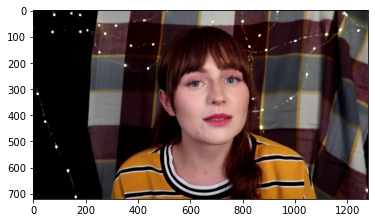

In [9]:
# import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
file_path = './datasets/images/frame0.jpg'
img_bgr = cv2.imread(file_path)
img_show = img_bgr.copy() # 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(len(dlib_rects))

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    roi = img_show[t:b, l:r]
    roi = cv2.GaussianBlur(roi,(5,5),5)
    
    img_show[t:t+roi.shape[0], l:l+roi.shape[1]] = roi

# plt.imshow(roi)
# img_gb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # np.transpose((2, 1, 0)) -> BGR TO RGB
plt.imshow(img_show[:,:,::-1]) # BGR -> RGB
cv2.imwrite('./datasets/gb_images/frame0_gb.jpg', img_show) # -> img_show


In [10]:
# Gaussian Blur 확인
tf.image.psnr(
    img_rgb[:,:,::-1], img_show, 255, name=None
)

<tf.Tensor: shape=(), dtype=float32, numpy=42.455177>

In [12]:
# 폴더별로(폴더 내의 모든 파일) Gaussian Blur 적용하기
# import re
count = 0
# apply gaussian blur
path_dir = './datasets/images/*'
file_list = glob.glob(path_dir)
file_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f)))) # 숫자로 indexing sort

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
for file in file_list:
    img_bgr = cv2.imread(file)
    img_show = img_bgr.copy() # 출력용 이미지 별도 보관
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
    
    try:
        for dlib_rect in dlib_rects:
            l = dlib_rect.left()
            t = dlib_rect.top()
            r = dlib_rect.right()
            b = dlib_rect.bottom()

            # cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
            roi = img_show[t:b, l:r]
            roi = cv2.GaussianBlur(roi,(5,5),5)

            img_show[t:t+roi.shape[0], l:l+roi.shape[1]] = roi

        cv2.imwrite('./datasets/gb_images/frame%d_gb.jpg' %count, img_show) # -> img_show
        count += 1
    except:
        print(file)
    

In [18]:
# # remove not applying Gaussian Blur
# remove = "./images/frame638.jpg./images/frame639.jpg ./images/frame640.jpg ./images/frame641.jpg./images/frame642.jpg./images/frame731.jpg./images/frame732.jpg./images/frame733.jpg./images/frame734.jpg./images/frame735.jpg./images/frame736.jpg./images/frame737.jpg./images/frame738.jpg./images/frame739.jpg./images/frame740.jpg./images/frame882.jpg./images/frame883.jpg./images/frame884.jpg./images/frame885.jpg./images/frame2219.jpg./images/frame2220.jpg./images/frame2221.jpg./images/frame2222.jpg./images/frame2223.jpg./images/frame2224.jpg./images/frame2225.jpg./images/frame2226.jpg./images/frame2227.jpg./images/frame2228.jpg./images/frame2229.jpg./images/frame2232.jpg./images/frame2233.jpg./images/frame2234.jpg./images/frame2235.jpg./images/frame2236.jpg./images/frame2237.jpg./images/frame2238.jpg./images/frame2239.jpg./images/frame2240.jpg./images/frame2241.jpg./images/frame2242.jpg./images/frame2243.jpg./images/frame2244.jpg./images/frame2246.jpg./images/frame2313.jpg./images/frame2470.jpg./images/frame2481.jpg./images/frame2482.jpg./images/frame2800.jpg./images/frame2802.jpg./images/frame2803.jpg./images/frame2804.jpg./images/frame2805.jpg./images/frame2806.jpg./images/frame2807.jpg./images/frame2808.jpg./images/frame2809.jpg./images/frame2810.jpg./images/frame7329.jpg./images/frame7330.jpg./images/frame7331.jpg./images/frame7332.jpg./images/frame7333.jpg./images/frame7334.jpg./images/frame7335.jpg./images/frame7336.jpg./images/frame7337.jpg./images/frame7338.jpg./images/frame7339.jpg./images/frame7340.jpg./images/frame7341.jpg./images/frame7342.jpg./images/frame7343.jpg./images/frame7344.jpg./images/frame7345.jpg./images/frame7361.jpg./images/frame7362.jpg./images/frame7363.jpg./images/frame7364.jpg./images/frame7365.jpg./images/frame8366.jpg./images/frame8367.jpg./images/frame8368.jpg./images/frame8369.jpg./images/frame8370.jpg./images/frame8371.jpg./images/frame8372.jpg./images/frame9381.jpg./images/frame9382.jpg./images/frame9383.jpg./images/frame9384.jpg./images/frame9385.jpg./images/frame9386.jpg./images/frame9387.jpg./images/frame9388.jpg./images/frame9389.jpg./images/frame9390.jpg./images/frame9391.jpg./images/frame9392.jpg./images/frame9393.jpg./images/frame9394.jpg./images/frame9395.jpg./images/frame9396.jpg./images/frame9397.jpg./images/frame9398.jpg./images/frame9399.jpg./images/frame9400.jpg./images/frame9401.jpg./images/frame9402.jpg./images/frame9403.jpg./images/frame9404.jpg./images/frame9405.jpg./images/frame9407.jpg./images/frame9408.jpg"
# remove = remove.replace(".jpg", ".jpg ")
# rm = remove.split(" ")

# path_dir = './images/*'
# file_list = glob.glob(path_dir)

# for rmfile in rm:
    
#     if rmfile in file_list:
#         print('Exist')
#         os.remove(rmfile)


Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist
Exist


In [4]:
# # Make Dataset
# real_dir = './dataset/images/*'
# file_list = glob.glob(real_dir)
# print(len(file_list)) # Real Data

# fake_dir = './dataset/gb_images/*'
# gb_list = glob.glob(fake_dir)
# print(len(gb_list)) # GB Data

9300
9300


In [5]:
# real_label = np.ones(len(file_list))
# fake_label = np.zeros(len(gb_list))

# START

In [13]:
real_data = tf.keras.preprocessing.image_dataset_from_directory(
    'datasets', batch_size=16, image_size=(224, 224), shuffle=True, seed=None, validation_split=None,
    interpolation='bilinear', follow_links=False
)

Found 21364 files belonging to 2 classes.


In [14]:
real_data.map # Dataset 확인

<bound method DatasetV2.map of <BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>>

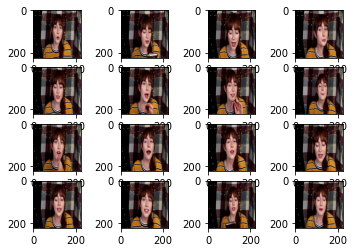

In [15]:
for img,label in real_data.take(1):
    for i in range(4):
        for j in range(4):
            plt.subplot(4,4,i*4+j+1)
            plt.imshow(img[i*4+j].numpy().astype(np.uint8))

In [16]:
label

<tf.Tensor: shape=(16,), dtype=int32, numpy=array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int32)>

In [17]:
base_model = tf.keras.applications.ResNet50(include_top=True, weights=None, input_shape=(224, 224, 3), classes=2, pooling=max)
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [18]:
base_model.compile(optimizer='adam', loss='binary_crossentropy') # adam, binary_cross_entropy

In [50]:
## base_model.fit(real_data) ### base_model.fit(dataset, label, epochs=10)

for epoch in range(10):
    for img, label in real_data:
        labels = tf.keras.utils.to_categorical(label)
        # print(labels)
        loss = base_model.train_on_batch(img, labels)
        print(f'loss : {loss}')
    print(f'epoch : {epoch} loss:{loss}')
    base_model.save(f'./models/deepfake_det_model_{epoch}.h5')

loss : 0.04488379880785942
loss : 0.0020595798268914223
loss : 0.0030609602108597755
loss : 0.0018616412999108434
loss : 0.0010257596150040627
loss : 0.001288854400627315
loss : 0.007144868839532137


KeyboardInterrupt: 

In [54]:
# Model Load
base_model = load_model('./models/deepfake_det_model_4.h5')

In [55]:
# base_model TEST
from PIL import Image

real = Image.open('./testset/frame0.jpg')
real_resize = real.resize((224, 224))
# test.reshape([256, 256, 3])
real_resize
real_test = np.array(real_resize)

prediction = base_model.predict(real_test[tf.newaxis,...]) #Testdata (reshape, plus new index)
prediction

array([[9.999213e-01, 7.872685e-05]], dtype=float32)

In [56]:
fake = Image.open('./testset/frame0_fake.jpg')
fake_resize = fake.resize((224, 224))
# test.reshape([256, 256, 3])
# testfile_resize
fake_test = np.array(fake_resize)

prediction = base_model.predict(fake_test[tf.newaxis,...]) #Testdata (reshape, plus new index)
prediction

array([[9.9983084e-01, 1.6907460e-04]], dtype=float32)

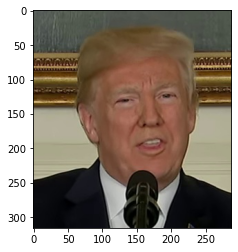

In [57]:
plt.imshow(real)

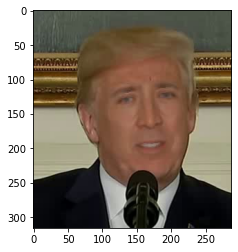

In [58]:
plt.imshow(fake)

# 모든 데이터에 대해 real 이라고 판단하는 문제